## Loading The Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/Users/JumpMan/Downloads/Stock Market Projects/Top10_Stock_Market_Data/top_10_stock_data.csv")

In [5]:
df.head(10)

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,1/2/15,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,1/5/15,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,1/6/15,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,1/7/15,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,1/8/15,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000
5,1/9/15,AAPL,28.167500,28.312500,27.552500,28.002501,24.971436,214798000
6,1/12/15,AAPL,28.150000,28.157499,27.200001,27.312500,24.356121,198603200
7,1/13/15,AAPL,27.857500,28.200001,27.227501,27.555000,24.572378,268367600
8,1/14/15,AAPL,27.260000,27.622499,27.125000,27.450001,24.478741,195826400
9,1/15/15,AAPL,27.500000,27.514999,26.665001,26.705000,23.814377,240056000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25486 entries, 0 to 25485
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       25486 non-null  datetime64[ns]
 1   Ticker     25486 non-null  object        
 2   Open       25486 non-null  float64       
 3   High       25486 non-null  float64       
 4   Low        25486 non-null  float64       
 5   Close      25486 non-null  float64       
 6   Adj Close  25486 non-null  float64       
 7   Volume     25486 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.6+ MB
None


In [10]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,25486,25486.000000,25486.000000,25486.000000,25486.000000,25486.000000,2.548600e+04
mean,2019-12-11 14:55:12.689319424,122.880757,124.155843,121.584466,122.910798,120.838984,7.770094e+07
min,2015-01-02 00:00:00,0.481250,0.487500,0.473500,0.478500,0.459453,0.000000e+00
25%,2017-07-14 00:00:00,39.992501,40.222501,39.664376,39.950251,38.005300,7.839552e+06
50%,2020-01-22 00:00:00,91.272247,92.334751,90.328251,91.234249,90.031422,2.504400e+07
75%,2022-05-10 00:00:00,165.699997,167.208370,164.027500,165.617496,164.885014,6.082800e+07
max,2024-08-29 00:00:00,956.200012,972.530029,949.950012,954.479981,954.479981,3.692928e+09
std,NaN,115.447694,116.647929,114.176053,115.447702,115.470334,1.571748e+08


In [11]:
df.dropna(inplace=True)

## Data Visualizations

### Correlation Matrix

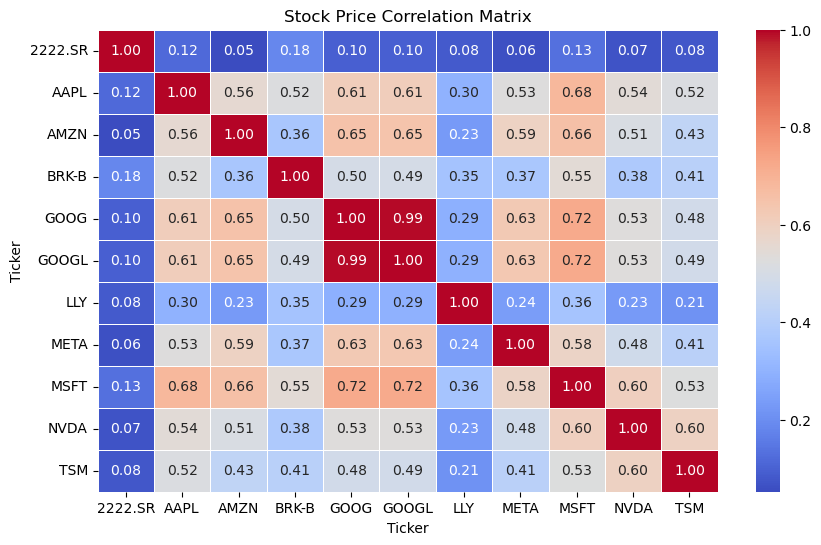

In [18]:
import numpy as np

pivot_df = df.pivot(index="Date", columns="Ticker", values="Close")
corr_matrix = pivot_df.pct_change().corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Stock Price Correlation Matrix")
plt.show()


### Moving Averages for Smoother Trends

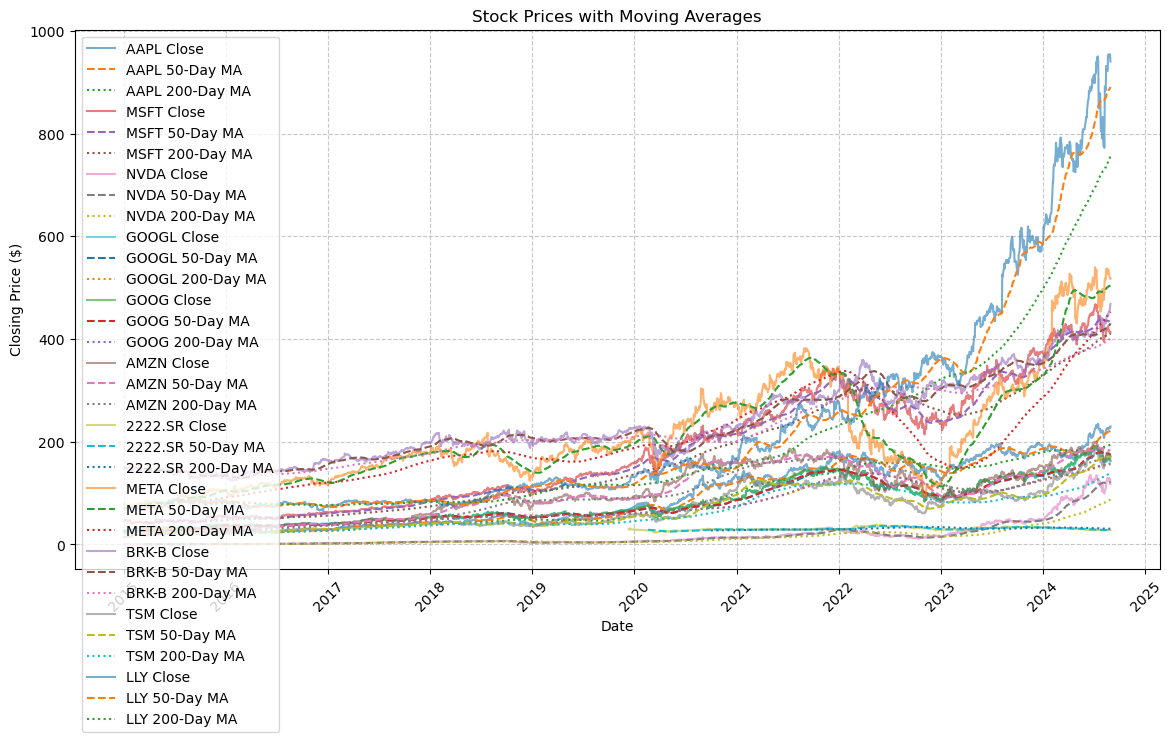

In [15]:
plt.figure(figsize=(14, 7))

for ticker in df['Ticker'].unique():
    temp_df = df[df['Ticker'] == ticker].copy()
    temp_df['MA_50'] = temp_df['Close'].rolling(window=50).mean()  # 50-day moving average
    temp_df['MA_200'] = temp_df['Close'].rolling(window=200).mean()  # 200-day moving average

    plt.plot(temp_df['Date'], temp_df['Close'], label=f"{ticker} Close", alpha=0.6)
    plt.plot(temp_df['Date'], temp_df['MA_50'], linestyle='dashed', label=f"{ticker} 50-Day MA")
    plt.plot(temp_df['Date'], temp_df['MA_200'], linestyle='dotted', label=f"{ticker} 200-Day MA")

plt.title("Stock Prices with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Daily Returns Historgrams

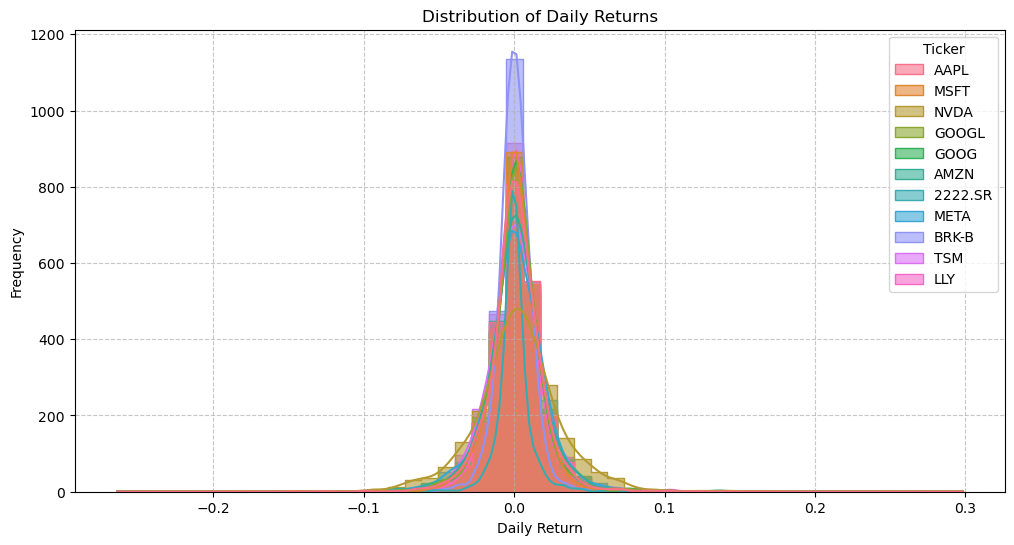

In [16]:
import seaborn as sns

df['Daily Return'] = df.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(12, 6))
sns.histplot(df.dropna(), x='Daily Return', hue='Ticker', bins=50, kde=True, element='step', alpha=0.6)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Candlestick Chart(open high and low close) price movements

In [22]:
pip install mplfinance


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


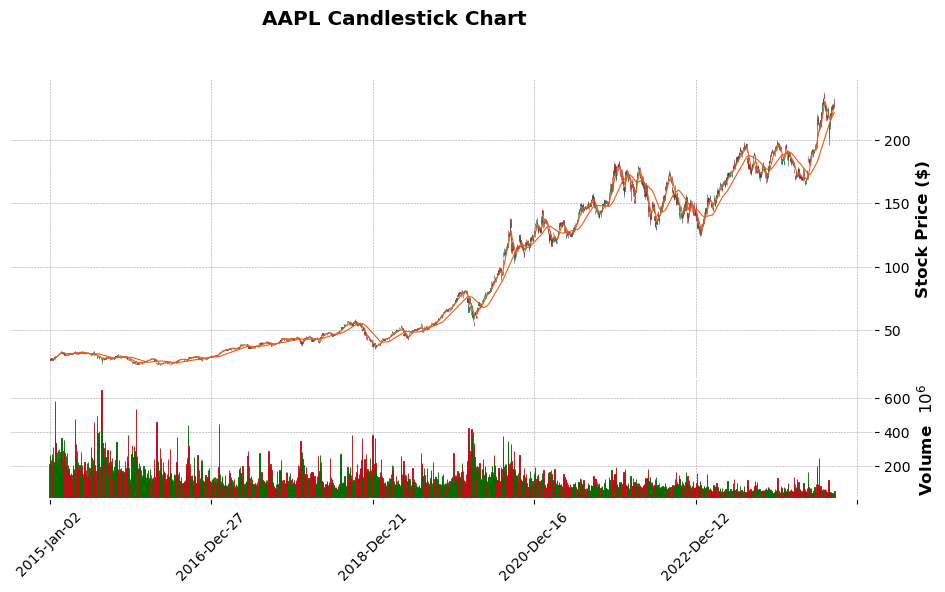

In [23]:
import pandas as pd
import mplfinance as mpf

# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select a specific stock
ticker = "AAPL"  # Change to the stock you want to visualize
stock_df = df[df['Ticker'] == ticker].copy()

# Rename columns to match mplfinance's expected format
stock_df = stock_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
stock_df.set_index("Date", inplace=True)

# Plot Candlestick Chart
mpf.plot(stock_df, 
         type="candle", 
         style="charles", 
         title=f"{ticker} Candlestick Chart", 
         ylabel="Stock Price ($)", 
         volume=True, 
         mav=(10, 50),  # Moving Averages (10-day & 50-day)
         figsize=(12, 6))


## Feature Engineering

In [24]:
# Feature Engineering: Moving Averages
df['MA50'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=50).mean())
df['MA200'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=200).mean())

In [25]:
# ARIMA Model for Stock Prediction
apple_df = df[df['Ticker'] == 'AAPL'].set_index('Date')
train_data, test_data = train_test_split(apple_df['Close'], test_size=0.2, shuffle=False)

# Fit ARIMA Model
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1944
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3759.208
Date:                Mon, 24 Feb 2025   AIC                           7530.416
Time:                        09:23:56   BIC                           7563.848
Sample:                             0   HQIC                          7542.710
                               - 1944                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0657      0.013     -5.168      0.000      -0.091      -0.041
ar.L2         -0.0128      0.012     -1.047      0.295      -0.037       0.011
ar.L3         -0.0201      0.014     -1.431      0.1

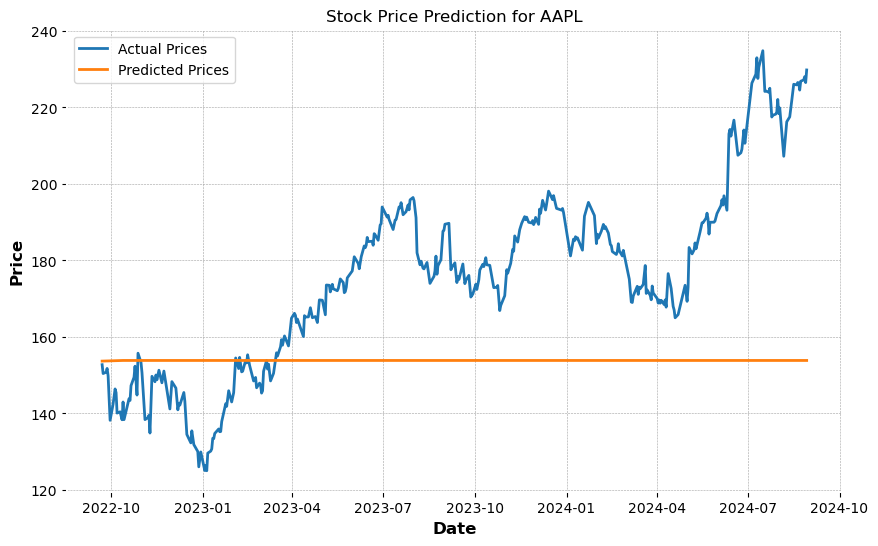

In [26]:
# Forecasting
forecast = model_fit.forecast(steps=len(test_data))
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Prices')
plt.plot(test_data.index, forecast, label='Predicted Prices')
plt.title("Stock Price Prediction for AAPL")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
GOOGL

# **SARIMAX Model Results Explanation**

## **1️⃣ Model Summary**
- **Dependent Variable:** `Close` (Stock Closing Prices)
- **Number of Observations:** `1944`
- **Model Type:** `ARIMA(5,1,0)`
  - **AR (5)**: Uses 5 past values (lags) to predict the current value.
  - **I (1)**: Data is differenced once to remove trends and make it stationary.
  - **MA (0)**: No moving average component included.
- **Log Likelihood:** `-3759.208`
- **AIC (Akaike Information Criterion):** `7530.416`  
- **BIC (Bayesian Information Criterion):** `7563.848`  
- **HQIC (Hannan-Quinn Criterion):** `7542.710`  

🔹 **Lower AIC/BIC values indicate a better model fit.** These can be used for comparison with other models.

---

## **2️⃣ Model Coefficients (AR Terms)**

| Term  | Coefficient | Std. Err. | Z-Score | P-Value | 95% Confidence Interval |
|--------|------------|-----------|---------|---------|-------------------------|
| **ar.L1**  | -0.0657  | 0.013  | -5.168  | 0.000 **(Significant)** | -0.091 to -0.041 |
| **ar.L2**  | -0.0128  | 0.012  | -1.047  | 0.295 (Not Significant) | -0.037 to 0.011 |
| **ar.L3**  | -0.0201  | 0.014  | -1.431  | 0.153 (Not Significant) | -0.048 to 0.007 |
| **ar.L4**  |  0.0228  | 0.012  |  1.829  | 0.067 (Almost Significant) | -0.002 to 0.047 |
| **ar.L5**  |  0.0364  | 0.012  |  2.937  | 0.003 **(Significant)** | 0.012 to 0.061 |

📌 **Key Takeaways:**
- **Significant Lags:** `ar.L1` (negative impact) and `ar.L5` (positive impact) contribute meaningfully to predictions.
- **Lags 2, 3, and 4 are not statistically significant**, meaning they don’t add much predictive power.
- **Sigma² (σ²) = 2.8055** → The estimated variance of the error term.

---

## **3️⃣ Model Diagnostics**
### **Residual Tests**
| Test | Value | Interpretation |
|------|-------|---------------|
| **Ljung-Box (L1) (Q):** | `0.00` | Tests for autocorrelation in residuals. ✅ **Prob(Q) = 0.97 → No significant autocorrelation** (good). |
| **Jarque-Bera (JB):** | `4124.77` | Tests for normality in residuals. ❌ **Prob(JB) = 0.00 → Residuals are not normally distributed.** |
| **Skew:** | `-0.19` | Slightly skewed left (not perfectly symmetrical). |
| **Kurtosis:** | `10.13` | High kurtosis → Extreme stock price movements are frequent. |

### **Volatility Test**
| Test | Value | Interpretation |
|------|-------|---------------|
| **Heteroskedasticity (H):** | `41.97` | ❌ **Prob(H) = 0.00 → Residual variance changes over time (high volatility).** |

🔹 **Stock prices often exhibit non-normal behavior and varying volatility, which may require a more advanced model like GARCH.**

---

## **📊 Final Interpretation**
✅ **Strengths:**
- The model captures short-term trends (`ar.L1` and `ar.L5` are significant).
- No strong autocorrelation in residuals (suggests a well-fitted model).

⚠️ **Weaknesses:**
- **Heteroskedasticity:** The model assumes constant variance, but stock prices fluctuate in volatility (a GARCH model might be better).
- **Non-normal residuals:** Suggests that extreme stock price movements occur more often than expected under a normal distribution.
- **Some lags are insignificant**, meaning a different ARIMA configuration (e.g., `ARIMA(1,1,1)`) may perform better.
